In [3]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [1]:
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_mining_dir = './'

covid_dataset_dir = data_mining_dir + 'Augmented Dataset/COVID/'
noncovid_dataset_dir = data_mining_dir + 'Augmented Dataset/non-COVID/'

dataset_dir = data_mining_dir + 'Augmented Dataset/'

covid_dir = pathlib.Path(covid_dataset_dir)
noncovid_dir = pathlib.Path(noncovid_dataset_dir)
data_dir = pathlib.Path(dataset_dir)

image_count = len(list(data_dir.glob('**/*.png')))
print(image_count)

20614


In [3]:
img_height = 256
img_width = 256
batch_size = 1024

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width), batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width), batch_size=batch_size)


Found 20816 files belonging to 2 classes.
Using 16653 files for training.
Found 20816 files belonging to 2 classes.
Using 4163 files for validation.


Class Names  ['COVID', 'non-COVID']


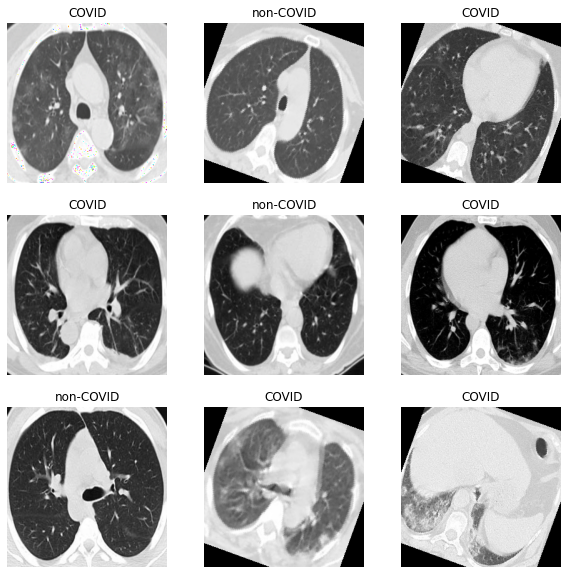

In [4]:
print("Class Names ", train_ds.class_names)

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_ds.class_names[labels[i]])
        plt.axis("off")

In [8]:
train_X = []
train_Y = []

for images, labels in train_ds.take(-1):
    images = tf.image.rgb_to_grayscale(images)
    images = tf.image.resize(images, [64,64])
    for i in range(images.shape[0]):
        train_X.append(images[i])
        train_Y.append(labels[i])

print(np.asarray(train_X).shape)
print(np.asarray(train_Y).shape)

(16653, 64, 64, 1)
(16653,)


In [11]:
test_X = []
test_Y = []

for images, labels in val_ds.take(-1):
    images = tf.image.rgb_to_grayscale(images)
    images = tf.image.resize(images, [64,64])
    for i in range(images.shape[0]):
        test_X.append(images[i])
        test_Y.append(labels[i])

print(np.asarray(test_X).shape)
print(np.asarray(test_Y).shape)

(4163, 64, 64, 1)
(4163,)


In [12]:
np.save(data_mining_dir + "train_X.npy", np.asarray(train_X).reshape(len(train_X),64,64))
np.save(data_mining_dir + "train_Y.npy", np.asarray(train_Y))
np.save(data_mining_dir + "test_X.npy", np.asarray(test_X).reshape(len(test_X),64,64))
np.save(data_mining_dir + "test_Y.npy", np.asarray(test_Y))

In [13]:
np.load(data_mining_dir + "train_X.npy").shape

(16653, 64, 64)